### 4.1-6

In [1]:
from sympy import symbols, diff, solve
import numpy as np

# 数据集 D
X = np.array([1.51, 1.64, 1.6, 1.73, 1.82, 1.87])
y = np.array([1.63, 1.7, 1.71, 1.72, 1.76, 1.86])

# 构造经验误差函数
w, b = symbols('w b', real=True)
RDh = 0
for (xi, yi) in zip(X, y):
	RDh += (yi - (xi*w + b))**2
RDh *= 1/len(X)

# 对 w 和 b 求偏导
eRDhw = diff(RDh, w)
eRDhb = diff(RDh, b)

# 求解方程组
ans = solve((eRDhw, eRDhb), (w, b))
print('使得经验误差函数 RD(h) 取最小值的参数为：{}'.format(ans))

使得经验误差函数 RD(h) 取最小值的参数为：{w: 0.514133333333440, b: 0.858543999999819}


### 4.2-5

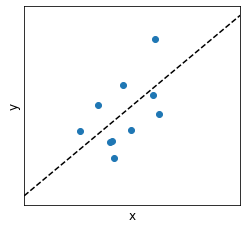

In [70]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

x_min, x_max = 1, 2.5

# 上帝函数 y=f(x)
def f(x):
	return 0.51*x+0.86

# 上帝分布 P(Y|X)
def P(X):
    # f(x) 加上期望为 0，标准差为 0.1 的高斯噪音
	return f(X) + np.random.normal(loc = 0, scale=0.1, size=X.shape) 

# 通过 P(X, Y) 生成数据集 D
# X 服从期望为 1.718，标准差为 0.3 的正态分布
X = np.random.normal(loc = 1.718, scale=0.3, size=10) 
y = P(X)

# 绘制代码
# 设置字体大小
plt.rcParams.update({'font.size': 12})
# 设置subfigure
fig, ax = plt.subplots(figsize = (6, 3))
plt.subplots_adjust(left=0.25, right=0.75, top=0.999, bottom=0.08)
ax.set_xlabel('x'),ax.set_ylabel('y')
ax.set(xticks=[], yticks=[])
ax.set_xlim(x_min, x_max)

# 绘制数据集
ax.scatter(x=X, y=y)

# 绘制 f(x)
xx = np.linspace(x_min, x_max)
ax.plot(xx, f(xx), 'k--')

plt.show()

### 4.3-2

In [98]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd

# 加载波士顿数据集
boston = load_boston()
X, y = boston.data, boston.target
print('总共有 {} 条数据，每条数据有 {} 个特征。'.format(X.shape[0], X.shape[1]))

# 设置输出选项
pd.set_option('expand_frame_repr', False)
pd.set_option('display.max_columns', 14)

# 将数据和标签拼接在一起，方便之后的打印
Xy = np.hstack((X,y.reshape(-1,1)))
feature_traget_names = np.hstack((boston.feature_names, (['PRICE'])))

# 打印数据集的前五行
print("打印该数据集的前五条数据（各包含 13 个特征）以及对应的标签（房价）：")
df = pd.DataFrame(Xy, columns=feature_traget_names)
print(df.head())

总共有 506 条数据，每条数据有 13 个特征。
打印该数据集的前五条数据（各包含 13 个特征）以及对应的标签（房价）：
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  PTRATIO       B  LSTAT  PRICE
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0     15.3  396.90   4.98   24.0
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0     17.8  396.90   9.14   21.6
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0     17.8  392.83   4.03   34.7
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0     18.7  394.63   2.94   33.4
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0     18.7  396.90   5.33   36.2


/Users/jiahuasong/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California 

In [99]:
from sympy import symbols, diff, solve
import numpy as np
from sklearn.datasets import load_boston
import timeit

# 加载波士顿数据集
X, y = load_boston(return_X_y=True)

# 开始计时
start = timeit.default_timer()

# 构造经验误差函数
w1, w2, w3, w4, w5, w6, w7, w8, w9, w10, w11, w12, w13, b = symbols('w1 w2 w3 w4 w5 w6 w7 w8 w9 w10 w11 w12 w13 b', real=True)
w = (w1, w2, w3, w4, w5, w6, w7, w8, w9, w10, w11, w12, w13)
RDh = 0
for (xi, yi) in zip(X, y):
	err = 0
	err += yi - b
	for (xii, wi) in zip(xi, w):
		err -= xii*wi
	RDh += err**2
RDh *= 1/len(X)

# 停止计时，打印耗时
stop = timeit.default_timer()
print('耗时 {:.2f} 秒'.format(stop - start))

/Users/jiahuasong/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California 

耗时 8.66 秒


### 4.3-7

In [121]:
from sklearn.datasets import load_boston
from numpy.linalg import matrix_rank
import numpy as np

# 加载波士顿数据集
boston = load_boston()
X0, y = boston.data, boston.target

# 构造 X，即给 X0 增加一列 1
ones = np.ones(X0.shape[0]).reshape(-1, 1)
X = np.hstack((ones, X0))

# 进行测试
rankX = matrix_rank(X)	#计算 X 的秩
print('X 是 {} x {} 的矩阵，秩为 {}，所以{}列满秩矩阵。'.format(X.shape[0], X.shape[1], rankX, '是' if rankX == X.shape[1] else '不是'))

X 是 506 x 14 的矩阵，秩为 14，所以是列满秩矩阵。


### 4.3-8

In [122]:
import numpy as np

# 父子身高数据集
X0 = np.array([1.51, 1.64, 1.6, 1.73, 1.82, 1.87]).reshape(-1, 1)
y = np.array([1.63, 1.7, 1.71, 1.72, 1.76, 1.86])

# 构造 X，即给 X0 增加一列 1
ones = np.ones(X0.shape[0]).reshape(-1, 1)
X = np.hstack((ones, X0))

pinvX = np.linalg.pinv(X)   # 计算伪逆
w = pinvX @ y               # 最小二乘法的矩阵算法

# 打印结果
print('最小二乘法的矩阵算法的结果为：w0 = {}, w1 = {}。'.format(w[0], w[1]))

最小二乘法的矩阵算法的结果为：w0 = 0.8585440000000055, w1 = 0.51413333333333。


### 4.3-9

In [135]:
import numpy as np
from sklearn.datasets import load_boston

# 读取波士顿房价数据集
X0, y = load_boston(return_X_y=True)

# 构造 X，即给 X0 增加一列 1
ones = np.ones(X0.shape[0]).reshape(-1, 1)
X = np.hstack((ones, X0))

pinvX = np.linalg.pinv(X)   # 计算伪逆
w = pinvX @ y               # 最小二乘法的矩阵算法

# 打印结果
with np.printoptions(precision=3, suppress=True):	# 设置输出格式
	print('结果：w = {} 。'.format(w))

结果：w = [ 36.459  -0.108   0.046   0.021   2.687 -17.767   3.81    0.001  -1.476
   0.306  -0.012  -0.953   0.009  -0.525] 。


### 4.4-2

In [137]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 读取波士顿房价数据集
X, y = load_boston(return_X_y=True)

# 70% 用于训练，30% 用于测试
X0_train, X0_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state = 0)

# 训练
# 构造 X_train，即给 X0_train 增加一行 1
ones = np.ones(X0_train.shape[0]).reshape(-1, 1)
X_train = np.hstack((ones, X0_train))

pinvX_train = np.linalg.pinv(X_train) # 计算伪逆
w = np.matmul(pinvX_train, y_train) # 最小二乘法的矩阵算法

# 打印训练结果
with np.printoptions(precision=3, suppress=True):	# 设置输出格式
	print('训练结果：w = {} 。'.format(w))

# 测试泛化能力
# 构造 X_test，即给 X0_test 增加一行 1
ones = np.ones(X0_test.shape[0]).reshape(-1, 1)
X_test = np.hstack((ones, X0_test))

# 根据训练出来的 w ，给出预测房价 y_pred
y_pred = np.matmul(X_test, w) # 求出 y_pred

# 打印测试结果
print('测试集上的经验误差，即泛化误差为：{}'.format(mean_squared_error(y_pred, y_test)))

训练结果：w = [ 37.937  -0.121   0.044   0.011   2.511 -16.231   3.859  -0.01   -1.5
   0.242  -0.011  -1.018   0.007  -0.487] 。
测试集上的经验误差，即泛化误差为：27.195965766883266


### 4.4-3

/Users/jiahuasong/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California 

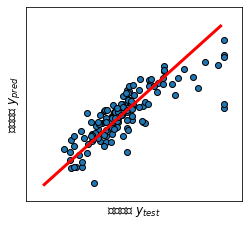

In [168]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 读取波士顿房价数据集
X, y = load_boston(return_X_y=True)

# 70% 用于训练，30% 用于测试
X0_train, X0_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state = 0)

# 训练和预测
# 构造 X_train，即给 X0_train 增加一行 1
ones = np.ones(X0_train.shape[0]).reshape(-1, 1)
X_train = np.hstack((ones, X0_train))

pinvX_train = np.linalg.pinv(X_train) # 计算伪逆
w = np.matmul(pinvX_train, y_train) # 最小二乘法的矩阵算法

# 构造 X_test，即给 X0_test 增加一行 1
ones = np.ones(X0_test.shape[0]).reshape(-1, 1)
X_test = np.hstack((ones, X0_test))

# 根据训练出来的 w ，给出预测房价 y_pred
y_pred = np.matmul(X_test, w) # 求出 y_pred

# 绘制代码
# 设置字体大小
plt.rcParams.update({'font.size': 12})
# 设置画布和坐标系
fig, ax = plt.subplots(figsize = (6, 3), nrows=1, ncols=1)

fig.subplots_adjust(left=0.25, right=0.75, top=0.999, bottom=0.1, )
xy_min, xy_max = -5, 55
ax.set_xticks(()),ax.set_yticks(())
ax.set_xlim(xy_min, xy_max),ax.set_ylim(xy_min, xy_max)
ax.set_xlabel('实际房价 $y_{test}$'),ax.set_ylabel('预测房价 $y_{pred}$')

# 绘制点 (y_test, y_pred)
ax.scatter(x=y_test, y=y_pred, edgecolor='k',)

# 绘制直线 y_test=y_pred
xx = np.arange(xy_min + 5, xy_max - 5)
yy = xx
plt.plot(xx, yy, color = 'red', lw = 3)

plt.show()

### 4.4-4

In [177]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 读取波士顿房价数据集
X, y = load_boston(return_X_y=True)

# 70% 用于训练，30% 用于测试
X0_train, X0_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state = 0)

# 训练
# 通过最小二乘法的矩阵算法来训练
# 构造 X_train，即给 X0_train 增加一行 1
ones = np.ones(X0_train.shape[0]).reshape(-1, 1)
X_train = np.hstack((ones, X0_train))

pinvX_train = np.linalg.pinv(X_train) # 计算伪逆
w1 = np.matmul(pinvX_train, y_train) # 最小二乘法的矩阵算法
with np.printoptions(precision=3, suppress=True):	# 设置输出格式
	print('最小二乘法的矩阵算法找到的 w = {}'.format(w1))

# 通过 sklearn 的 LinearRegression 来训练
LR = LinearRegression().fit(X0_train, y_train)
w2 = np.insert(LR.coef_, 0, LR.intercept_, axis=0)
with np.printoptions(precision=3, suppress=True):	# 设置输出格式
	print('sklearn 找到的 w = {}'.format(w2))

最小二乘法的矩阵算法找到的 w = [ 37.937  -0.121   0.044   0.011   2.511 -16.231   3.859  -0.01   -1.5
   0.242  -0.011  -1.018   0.007  -0.487]
sklearn 找到的 w = [ 37.937  -0.121   0.044   0.011   2.511 -16.231   3.859  -0.01   -1.5
   0.242  -0.011  -1.018   0.007  -0.487]


/Users/jiahuasong/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California 

AttributeError: 'LinearRegression' object has no attribute 'intercept__'